In [1]:
rootF = 'D:/Data/Paper defocus/'

In [2]:
import os as os
import numpy as np
from numpy import *
from scipy.stats import linregress, wilcoxon
from scipy.optimize import curve_fit

# Plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns

# Import functions
from shared.functions import corrcoef, convert_pvalue_to_stars
from shared.save_load import load_obj, save_obj

In [3]:
experiments = [20211129, 20211207, 20211208]

# Experiment conditions
from shared.parameters_stimulation2 import *

In [4]:
### Cells from the 2 interesting types

selected_cells = [[1, 258, 404, 406, 433, 604],             
                   [77, 129, 184, 217, 229, 246, 310, 381, 393, 396, 405, 418, 458, 472, 476, 479, 491, 498],             
                   [273, 435, 449, 463, 513]]   

print ('N = ', len(selected_cells))

N =  3


# Load data

### Spike counts

#### Train and test sets

In [6]:
clusters_all_exps = []
train_y_all_exps = []
train_int_all_exps = []
train_lsc_all_exps = []
test_y_all_exps = []
test_int_all_exps = []
test_lsc_all_exps = []

for iExp, exp in enumerate(experiments):
    data_path = rootF + '/MEA/exp' + str(exp) + '/'
    train_data = load(data_path + str(exp) + '_liu_2022_data_ON_alpha.npz', allow_pickle=True)

    clusters = train_data['clusters']
    clusters_all_exps.append(clusters)

    train_y_all_exps.append(train_data['spike_count_train']) 
    train_int_all_exps.append(train_data['intensities_train']) 
    train_lsc_all_exps.append(train_data['contrast_train'])
    
    test_y_all_exps.append(train_data['spike_count_test'].mean(axis=0))
    test_int_all_exps.append(train_data['intensities_test'])
    test_lsc_all_exps.append(train_data['contrast_test'])

    print (train_data['spike_count_train'].shape)
    print (test_y_all_exps[iExp].shape)
    print (test_int_all_exps[iExp].shape)

(3160, 116)
(30, 116)
(30, 6)
(3160, 132)
(30, 132)
(30, 18)
(3160, 150)
(30, 150)
(30, 5)


# Models

In [7]:
def softplus_fct(x, a, b, c):
    return a * np.log(1 + np.exp(b * (x + c)))

In [8]:
def random_search(function, input_, target, rn_nb, method='lm'):  #'trf','dogbox'
    ### Range of initial values
    # Values working for cell 130 too
    a0_range=np.arange(0,2,0.01)
    b0_range=np.arange(0,200,0.1)
    c0_range=np.arange(-0.5,0.5,.0001)

    points=[]
    for run in range(rn_nb):
        a0=random.choice(a0_range)
        b0=random.choice(b0_range)
        c0=random.choice(c0_range)
        try:
            popt, covar = curve_fit(function, input_, target, p0 = [a0, b0, c0], method=method)
            trial = function(input_,*popt)
            points.append(np.append(popt,((trial-target)**2).sum()))
        except RuntimeError:
            points.append(np.append(np.zeros(3),100000 ))

    points=np.array(points)
#     print (points)
    return points[points[:,-1].argmin(),:]

## Fit LN model

1 1


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.44468167e+00 2.72681822e+02 1.96263678e-02]


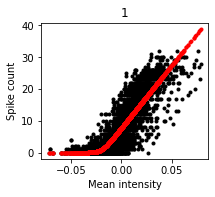

258 258


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[1.36117896e+00 2.42929069e+02 6.20973073e-03]


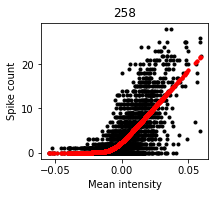

404 404


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[1.63634701e+00 2.19073646e+02 1.56681296e-02]


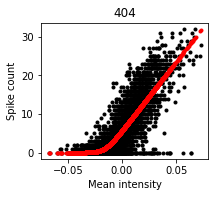

406 406


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.54395647e+00 2.65345841e+02 1.34540416e-02]


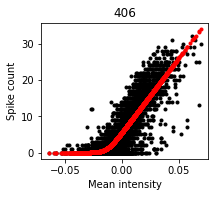

433 433


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.45479528e+00 2.18932855e+02 6.25850010e-03]


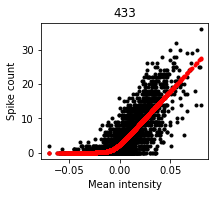

604 604


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.15744633e+00 2.62613562e+02 5.94620726e-03]


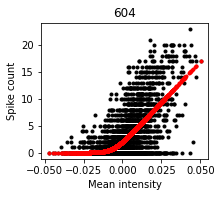

77 77


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[1.09494424e+00 1.13159977e+02 6.76857861e-03]


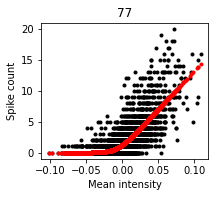

129 129


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[2.47333010e+00 8.48271099e+01 1.29425131e-02]


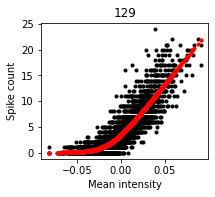

184 184


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[6.86124937e-01 2.53236048e+02 1.66661841e-02]


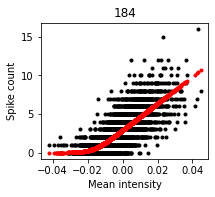

217 217


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[4.32976967e+00 4.27877809e+01 2.80629114e-02]


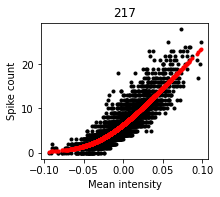

229 229


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.37806070e+00 9.82065448e+01 2.07675518e-02]


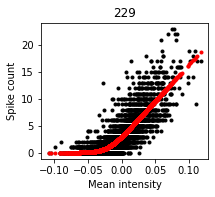

246 246


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.92213285e+00 9.63993212e+01 1.09256210e-02]


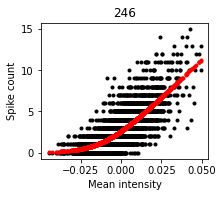

310 310


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.56740480e+00 9.09179804e+01 1.84364625e-02]


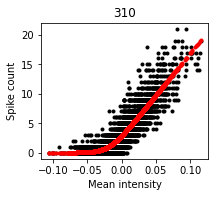

381 381


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[2.78204234e+00 5.46061231e+01 2.13913445e-02]


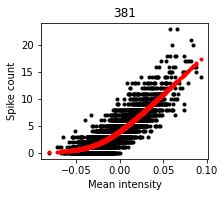

393 393


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.40702330e+00 1.16858898e+02 8.43034319e-03]


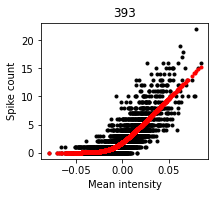

396 396


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[ 1.84351597e+00  1.27744985e+02 -5.18671455e-03]


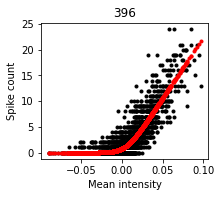

405 405


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[2.55469347e+00 8.09316437e+01 2.55929349e-02]


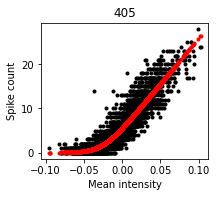

418 418


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[1.60317799e+00 7.56880546e+01 3.41059022e-02]


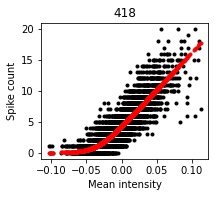

458 458


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[2.50516625e+00 8.98357083e+01 1.29764355e-02]


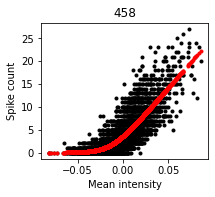

472 472


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.31542277e+00 1.58007978e+02 3.24642138e-03]


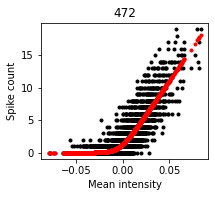

476 476
[1.48481040e+00 1.05984249e+02 8.32920037e-03]


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


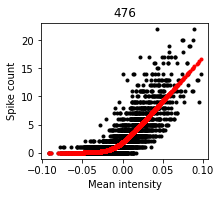

479 479


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[1.92557126e+00 8.34910893e+01 1.43593894e-02]


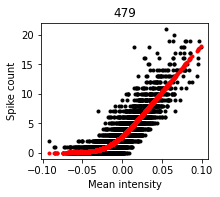

491 491


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.88126931e+00 8.76830906e+01 1.11866446e-02]


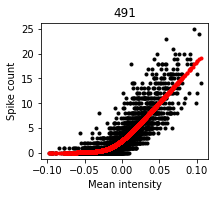

498 498


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[2.91848854e+00 4.01863969e+01 1.91114258e-02]


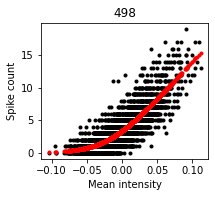

273 273


/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))


[8.72257534e-01 3.27175737e+02 1.32050437e-02]


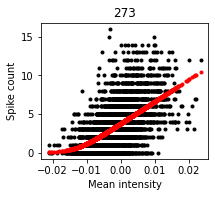

435 435


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.22942552e+00 2.28185710e+02 3.28597644e-02]


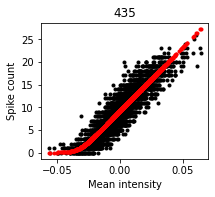

449 449


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.22391178e+00 2.40547321e+02 3.21297383e-02]


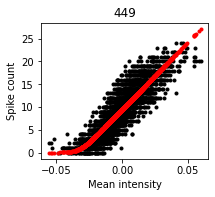

463 463


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.32369644e+00 1.67189831e+02 4.00875374e-02]


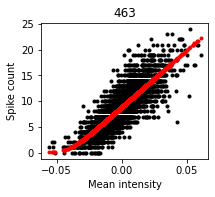

513 513


/tmp/ipykernel_161054/509033475.py:2: RuntimeWarning: overflow encountered in exp
  return a * np.log(1 + np.exp(b * (x + c)))
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


[1.60973039e+00 3.97289000e+02 1.36379038e-02]


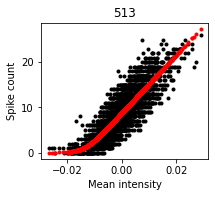

In [9]:
params_ln_all_exps = []

for iExp in range(len(experiments)):
    params_ln = np.zeros((len(selected_cells[iExp]), 3))

    for iCell, cell_nb in enumerate(selected_cells[iExp]):
        index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
        print (cell_nb, clusters_all_exps[iExp][index])

        best_params = random_search(softplus_fct, train_int_all_exps[iExp][:, iCell], train_y_all_exps[iExp][:, index], rn_nb=50)[:-1]
        params_ln[iCell] = best_params
        print (best_params)

        plt.figure(figsize=(3,2.5))
        plt.title(cell_nb)
        plt.plot(train_int_all_exps[iExp][:, iCell], train_y_all_exps[iExp][:, index], 'k.')
        plt.plot(train_int_all_exps[iExp][:, iCell], softplus_fct(train_int_all_exps[iExp][:, iCell], *best_params), 'r.')
        plt.xlabel('Mean intensity')
        plt.ylabel('Spike count')
        plt.show()
    params_ln_all_exps.append(params_ln)

## Test LN model

1 1


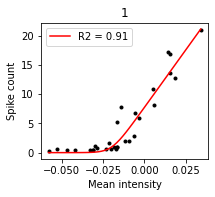

258 258


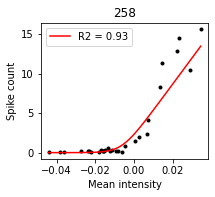

404 404


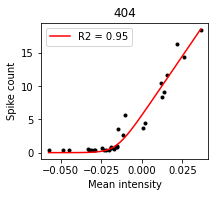

406 406


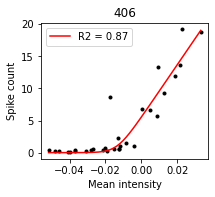

433 433


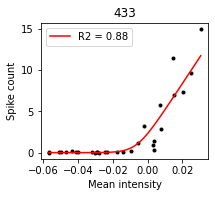

604 604


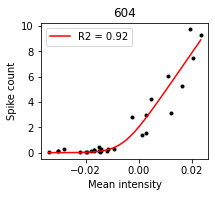

77 77


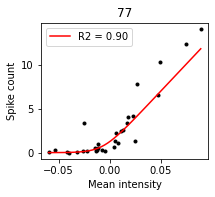

129 129


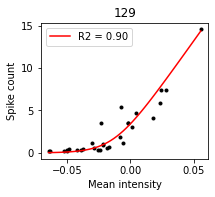

184 184


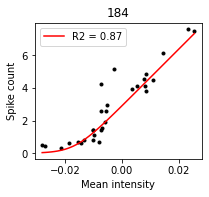

217 217


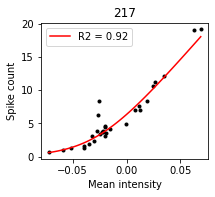

229 229


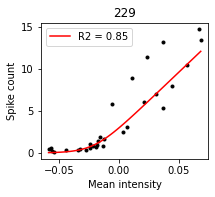

246 246


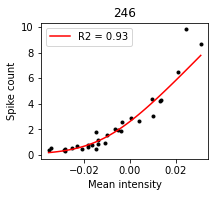

310 310


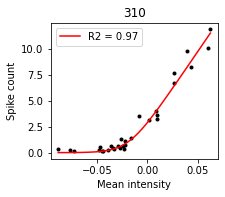

381 381


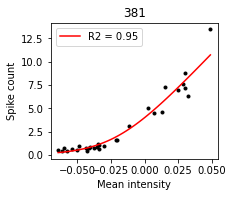

393 393


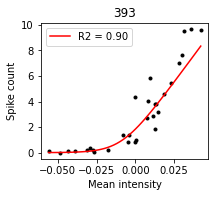

396 396


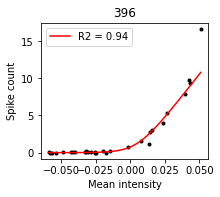

405 405


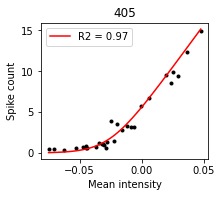

418 418


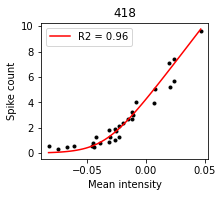

458 458


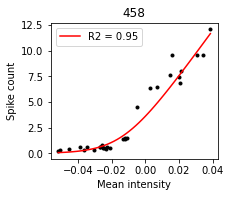

472 472


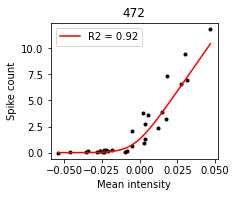

476 476


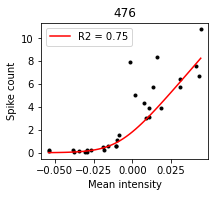

479 479


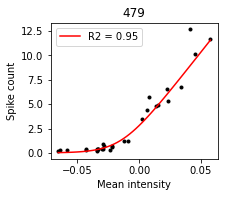

491 491


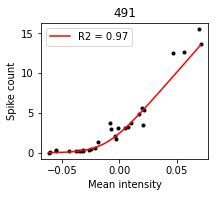

498 498


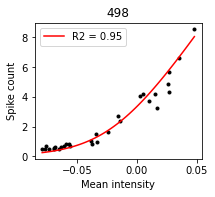

273 273


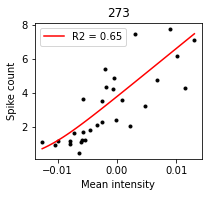

435 435


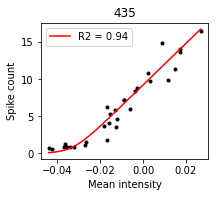

449 449


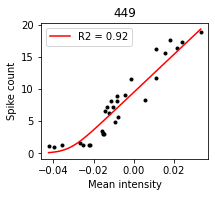

463 463


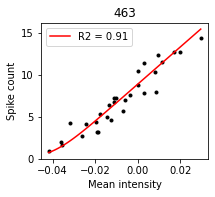

513 513


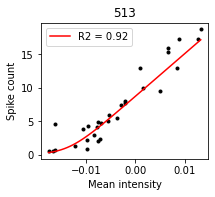

In [10]:
explained_vars_LN_model_all_exps = []

for iExp in range(len(experiments)):
    explained_vars_LN_model = np.zeros((len(selected_cells[iExp])))

    for iCell, cell_nb in enumerate(selected_cells[iExp]):
        index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
        print (cell_nb, clusters_all_exps[iExp][index])

        x_vals = np.linspace(min(test_int_all_exps[iExp][:, iCell]), max(test_int_all_exps[iExp][:, iCell]), 50)
        prediction = softplus_fct(test_int_all_exps[iExp][:, iCell], *params_ln_all_exps[iExp][iCell])
        corr_coef = corrcoef(prediction, test_y_all_exps[iExp][:, index])
        explained_vars_LN_model[iCell] = corr_coef**2

        plt.figure(figsize=(3,2.5))
        plt.title(cell_nb)
        plt.plot(test_int_all_exps[iExp][:, iCell], test_y_all_exps[iExp][:, index], 'k.')
        plt.plot(x_vals, softplus_fct(x_vals, *params_ln_all_exps[iExp][iCell]), 'r-', label = 'R2 = %0.02f'%corr_coef**2)
        plt.xlabel('Mean intensity')
        plt.ylabel('Spike count')
        plt.legend()
        plt.show()
        
    explained_vars_LN_model_all_exps.append(explained_vars_LN_model)

0.9088317839433203 0.06624165795043037
N =  29


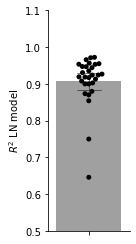

In [12]:
stacked_ln_expl_vars = hstack([explained_vars_LN_model_all_exps[0], \
                               explained_vars_LN_model_all_exps[1], \
                               explained_vars_LN_model_all_exps[2]])

print (mean(stacked_ln_expl_vars), std(stacked_ln_expl_vars))
print ('N = ', len(stacked_ln_expl_vars))

fig = plt.figure(figsize=(2,3.5))
GS = fig.add_gridspec(1, 1)

ax = fig.add_subplot(GS[0])
ax.set_ylim(0.5, 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(y = stacked_ln_expl_vars, color = 'grey', alpha = 0.75, errcolor='k', errwidth = 0.5, capsize = 0.3)
sns.swarmplot(y = stacked_ln_expl_vars, color='k')
ax.set_xticklabels([])
ax.set_ylabel('$R^2$ LN model')

plt.tight_layout()
plt.show()

## Fit LSC model

In [13]:
rn_nb = 50
method = 'lm'
w_range = np.arange(-2,2.55,0.05)

results_file = rootF + '/Modelling/Liu_2022_params_LSC_model_ON_alpha.npz'

if os.path.isfile(results_file):
    print ('Loading data')
    data = np.load(results_file, allow_pickle=True)
    params_lsc_model_all_exps = data['LSC_model_params']
    lsc_weights_all_exps = data['LSC_weights']
else:
    params_lsc_model_all_exps = []
    lsc_weights_all_exps = []

    for iExp in range(len(experiments)):
        params_lsc_model = np.zeros((len(selected_cells[iExp]), 3)) 
        lsc_weights = np.zeros((len(selected_cells[iExp]))) 

        for iCell, cell_nb in enumerate(selected_cells[iExp]):
            index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
            print (cell_nb, clusters_all_exps[iExp][index])

            params = []
            for w in w_range:
                input_ = train_int_all_exps[iExp][:, iCell] + w*train_lsc_all_exps[iExp][:, iCell]
                target = train_y_all_exps[iExp][:, index]

                ##### Optimizing a,b,c
                # Values working for cell 130 too
                a0_range=np.arange(0,2,0.01)
                b0_range=np.arange(0,200,0.1)
                c0_range=np.arange(-0.5,0.5,.0001)

                points=[]
                for run in range(rn_nb):
                    a0=random.choice(a0_range)
                    b0=random.choice(b0_range)
                    c0=random.choice(c0_range)
                    try:
                        popt, covar = curve_fit(lambda x, a, b, c: a * np.log(1 + np.exp(b * (x + c))), \
                                                input_, target, p0 = [a0, b0, c0], method=method)
                        trial = softplus_fct(input_,*popt)
                        points.append(np.append(popt,((trial-target)**2).sum()))
                    except RuntimeError:
                        points.append(np.append(np.zeros(3),100000 ))

                points=np.array(points)
                best_popt = points[points[:,-1].argmin(),:]
                params.append(best_popt)

            ### Selecting the best weight
            params = np.array(params)
            best_idx = argmin(params[:,-1])
            params_lsc_model[iCell] = params[best_idx,:][:-1]
            lsc_weights[iCell] = w_range[best_idx]

        lsc_weights_all_exps.append(lsc_weights)
        params_lsc_model_all_exps.append(params_lsc_model)

1 1


/tmp/ipykernel_161054/2716137346.py:41: RuntimeWarning: overflow encountered in exp
  popt, covar = curve_fit(lambda x, a, b, c: a * np.log(1 + np.exp(b * (x + c))), \
/home/sarah/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


258 258
404 404
406 406
433 433
604 604
77 77
129 129
184 184
217 217
229 229
246 246
310 310
381 381
393 393
396 396
405 405
418 418
458 458
472 472
476 476
479 479
491 491
498 498
273 273
435 435
449 449
463 463
513 513


In [14]:
# Save this selection

output_folder = rootF + '/Modelling/'
    
np.savez(output_folder + 'Liu_2022_params_LSC_model_ON_alpha.npz', \
      LSC_weights = np.array(lsc_weights_all_exps, dtype='object'),\
      LSC_model_params = np.array(params_lsc_model_all_exps, dtype='object'))

## Test LSC model

1 1


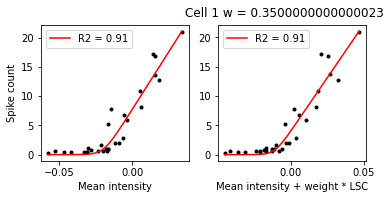

258 258


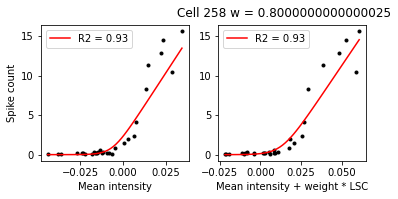

404 404


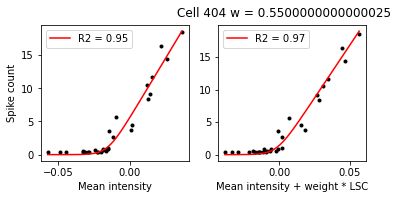

406 406


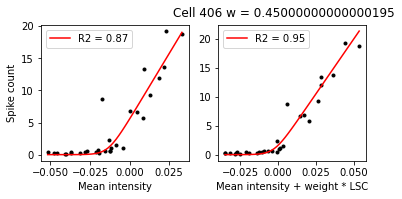

433 433


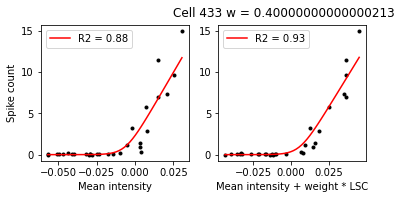

604 604


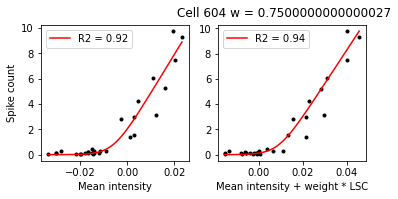

77 77


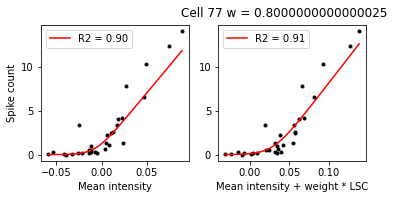

129 129


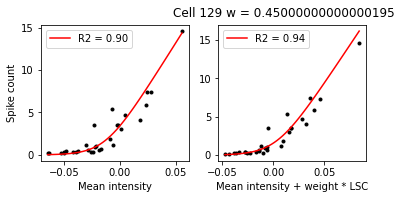

184 184


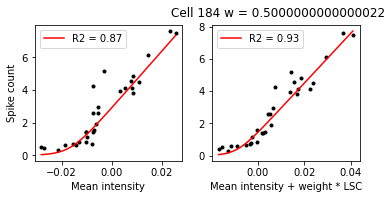

217 217


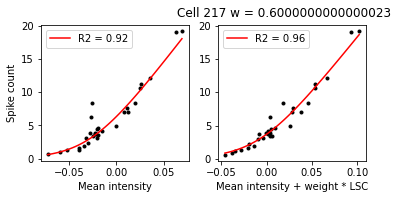

229 229


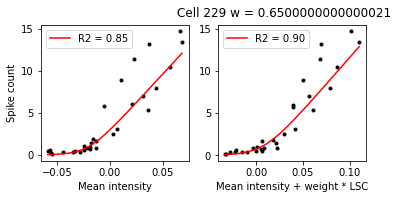

246 246


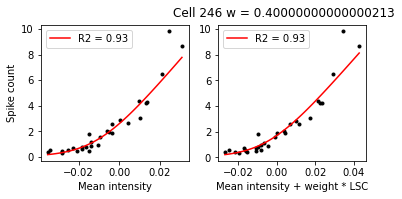

310 310


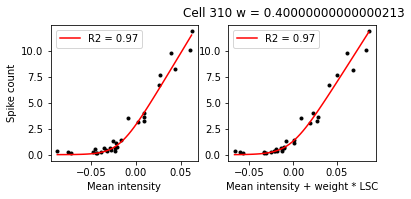

381 381


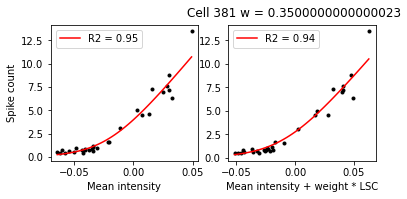

393 393


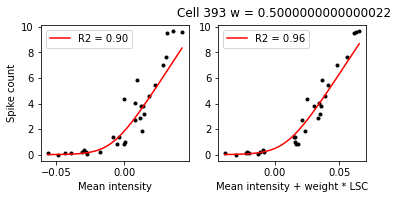

396 396


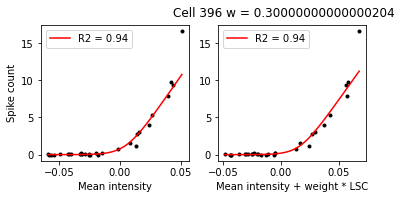

405 405


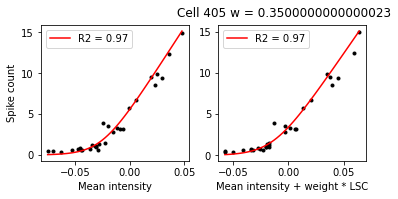

418 418


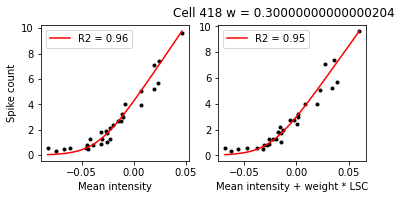

458 458


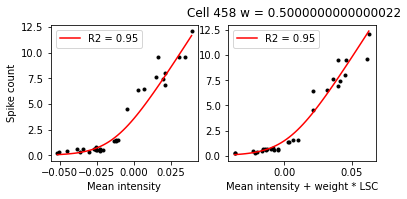

472 472


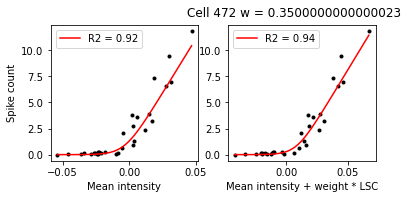

476 476


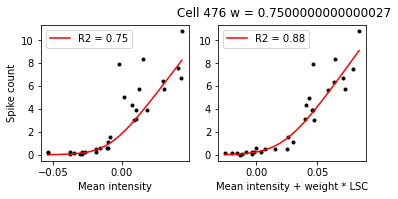

479 479


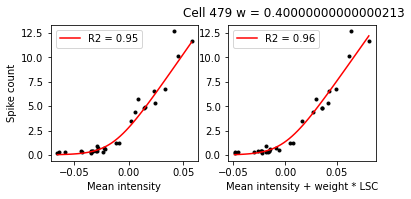

491 491


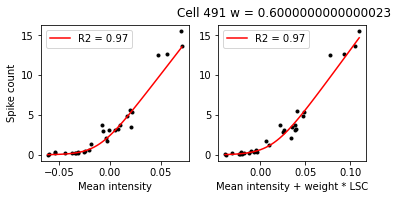

498 498


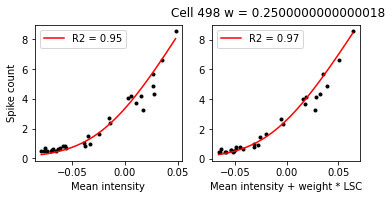

273 273


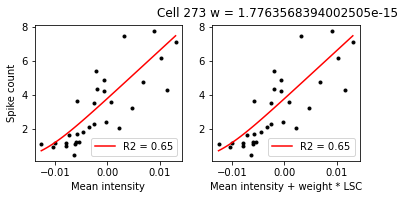

435 435


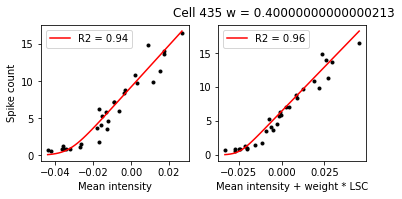

449 449


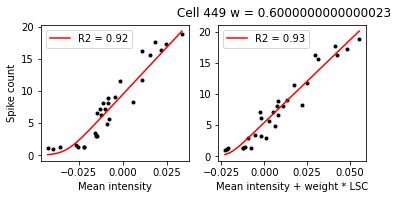

463 463


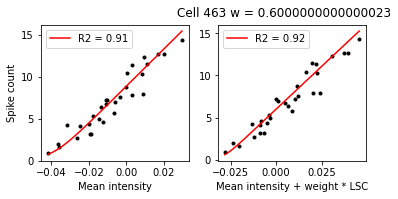

513 513


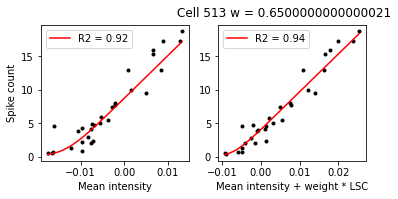

In [15]:
explained_vars_LSC_model_all_exps = []

for iExp in range(len(experiments)):
    explained_vars_LSC_model = np.zeros((len(selected_cells[iExp])))

    for iCell, cell_nb in enumerate(selected_cells[iExp]):
        index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
        print (cell_nb, clusters_all_exps[iExp][index])
        
        ### LSC
        input_ = test_int_all_exps[iExp][:, iCell] + lsc_weights_all_exps[iExp][iCell]*test_lsc_all_exps[iExp][:, iCell]
        prediction = softplus_fct(input_, *params_lsc_model_all_exps[iExp][iCell])
        corr_coef_lsc = corrcoef(prediction, test_y_all_exps[iExp][:, index])
        explained_vars_LSC_model[iCell] = corr_coef_lsc**2

        plt.figure(figsize=(9,2.5))
        plt.suptitle('Cell {} w = {}'.format(cell_nb, lsc_weights_all_exps[iExp][iCell]))
        plt.subplot(131)
        x_vals = np.linspace(min(test_int_all_exps[iExp][:, iCell]), max(test_int_all_exps[iExp][:, iCell]), 50)
        plt.plot(test_int_all_exps[iExp][:, iCell], test_y_all_exps[iExp][:, index], 'k.')
        plt.plot(x_vals, softplus_fct(x_vals, *params_ln_all_exps[iExp][iCell]), 'r-', \
                 label = 'R2 = %0.02f'%explained_vars_LN_model_all_exps[iExp][iCell])
        plt.xlabel('Mean intensity')
        plt.ylabel('Spike count')
        plt.legend()
        plt.subplot(132)
        plt.plot(input_, test_y_all_exps[iExp][:, index], 'k.')
        x_vals = np.linspace(min(input_), max(input_), 50)
        plt.plot(x_vals, softplus_fct(x_vals, *params_lsc_model_all_exps[iExp][iCell]), 'r-', label = 'R2 = %0.02f'%corr_coef_lsc**2)
        plt.xlabel('Mean intensity + weight * LSC')
        plt.legend()

        plt.show()
    explained_vars_LSC_model_all_exps.append(explained_vars_LSC_model)

0.9316989481073302 0.0583174461912819


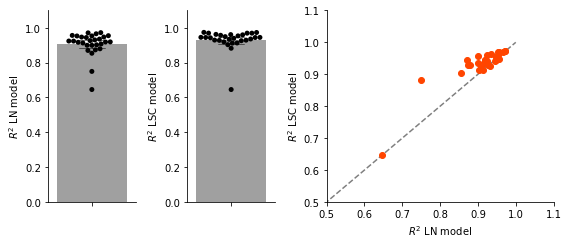

In [17]:
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.arange(0,20,1)]

skip_cells = [558, 625]

fig = plt.figure(figsize=(8,3.5))
GS = fig.add_gridspec(1, 4)

ax = fig.add_subplot(GS[0])
ax.set_ylim(0, 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(y = stacked_ln_expl_vars, color = 'grey', alpha = 0.75, errcolor='k', errwidth = 0.5, capsize = 0.3)
sns.swarmplot(y = stacked_ln_expl_vars, color='k')
ax.set_xticklabels([])
ax.set_ylabel('$R^2$ LN model')

ax = fig.add_subplot(GS[1])
stacked_lsc_expl_vars = hstack([explained_vars_LSC_model_all_exps[0], \
                                explained_vars_LSC_model_all_exps[1], \
                                explained_vars_LSC_model_all_exps[2]])

print (mean(stacked_lsc_expl_vars), std(stacked_lsc_expl_vars))

ax.set_ylim(0, 1.1)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
sns.barplot(y = stacked_lsc_expl_vars, color = 'grey', alpha = 0.75, errcolor='k', errwidth = 0.5, capsize = 0.3)
sns.swarmplot(y = stacked_lsc_expl_vars, color='k')
ax.set_xticklabels([])
ax.set_ylabel('$R^2$ LSC model')

ax = fig.add_subplot(GS[2:4])
ax.set_ylim(0.5, 1.1)
ax.set_xlim(0.5, 1.1)
ax.plot([0,1], [0,1], 'k--', alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for iExp in range(len(experiments)):
    for iCell, cell_nb in enumerate(selected_cells[iExp]):
        ax.plot(explained_vars_LN_model_all_exps[iExp][iCell], \
                    explained_vars_LSC_model_all_exps[iExp][iCell], 'o', color='orangered')
ax.set_ylabel('$R^2$ LSC model')
ax.set_xlabel('$R^2$ LN model')
plt.tight_layout()
plt.show()

In [18]:
### Save data for Figure 4

output_folder = rootF + '/Modelling/'
    
iExp = 1
cell_nb = 479
iCell = where(array(selected_cells[iExp]) == cell_nb)[0][0]
index = where(clusters_all_exps[iExp] == cell_nb)[0][0]
print (cell_nb, clusters_all_exps[iExp][index])

### LN
x_vals_LN = np.linspace(1.2*min(test_int_all_exps[iExp][:, iCell]), 1.2*max(test_int_all_exps[iExp][:, iCell]), 50)
prediction_LN = softplus_fct(x_vals_LN, *params_ln_all_exps[iExp][iCell])

### LSC
input_ = test_int_all_exps[iExp][:, iCell] + lsc_weights_all_exps[iExp][iCell]*test_lsc_all_exps[iExp][:, iCell]
x_vals_LSC = np.linspace(0.8*min(input_), 1.2*max(input_), 50)
prediction_LSC = softplus_fct(x_vals_LSC, *params_lsc_model_all_exps[iExp][iCell])

np.savez(output_folder + 'data_figure_4_ON_alpha.npz', selected_cells = np.array(selected_cells, dtype='object'), \
      intensity = test_int_all_exps[iExp][:, iCell], spike_counts = test_y_all_exps[iExp][:, index],\
      x_pred_LN = x_vals_LN, predictions_LN = prediction_LN,\
      intensity_and_SC = input_, x_pred_LSC = x_vals_LSC, predictions_LSC = prediction_LSC,\
      expl_var_LN = np.array(explained_vars_LN_model_all_exps, dtype='object'), \
      expl_var_LSC = np.array(explained_vars_LSC_model_all_exps, dtype='object'))


479 479
